In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score

from matplotlib import pyplot as plt

from data_handler import TrainDataHandler


TRAIN_VARIANTS_PATH = "../data/training_variants/training_variants"
TRAIN_TEXT_PATH = "../data/training_text/training_text"


# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2   

In [2]:
train_data_handler = TrainDataHandler(TRAIN_VARIANTS_PATH, TRAIN_TEXT_PATH)

2022-12-16 21:43:04 | DEBUG    | data_handler         | Loading the train variants data..
2022-12-16 21:43:04 | DEBUG    | data_handler         | Loading the train text data..
2022-12-16 21:43:05 | DEBUG    | data_handler         | Preparing train data ..
2022-12-16 21:43:05 | INFO     | data_handler         | Train data is loaded. (Data size: (3316, 5))


In [3]:
train_data_handler.train_data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [4]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    train_data_handler.train_data['Text'], train_data_handler.train_data['Class'], 
    test_size=0.2, random_state=0, stratify=train_data_handler.train_data['Class']
)

# vectorize the text
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [5]:
# train the models
model_svc = SVC()
model_rf = RandomForestClassifier()
model_lr = LogisticRegression(max_iter=1000)
model_nb = MultinomialNB()
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_ada = AdaBoostClassifier()
model_gbc = GradientBoostingClassifier()
model_et = ExtraTreesClassifier()
model_bag = BaggingClassifier()
model_mlp = MLPClassifier()
model_gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
model_gnb = GaussianNB()

classifiers = [
    model_svc,
    model_rf,
    model_lr,
    model_nb,
    model_knn,
    model_dt,
    model_ada,
    model_gbc,
    model_et,
    model_bag,
    model_mlp,
]

for classifier in classifiers:
    print("Fitting classifier: ", classifier)
    classifier.fit(X_train, y_train)

Fitting classifier:  SVC()
Fitting classifier:  RandomForestClassifier()
Fitting classifier:  LogisticRegression(max_iter=1000)
Fitting classifier:  MultinomialNB()
Fitting classifier:  KNeighborsClassifier()
Fitting classifier:  DecisionTreeClassifier()
Fitting classifier:  AdaBoostClassifier()
Fitting classifier:  GradientBoostingClassifier()
Fitting classifier:  ExtraTreesClassifier()
Fitting classifier:  BaggingClassifier()
Fitting classifier:  MLPClassifier()


C:\Users\ibrah\anaconda3\envs\MyDL\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# predict the test data
pred = {}
for classifier in classifiers:
    print("Predicting with classifier: ", classifier)
    pred[classifier.__class__.__name__] = classifier.predict(X_test)

Predicting with classifier:  SVC()
Predicting with classifier:  RandomForestClassifier()
Predicting with classifier:  LogisticRegression(max_iter=1000)
Predicting with classifier:  MultinomialNB()
Predicting with classifier:  KNeighborsClassifier()
Predicting with classifier:  DecisionTreeClassifier()
Predicting with classifier:  AdaBoostClassifier()
Predicting with classifier:  GradientBoostingClassifier()
Predicting with classifier:  ExtraTreesClassifier()
Predicting with classifier:  BaggingClassifier()
Predicting with classifier:  MLPClassifier()


In [7]:
for classifier in classifiers:
    print("Accuracy score for classifier: ", classifier)
    print(accuracy_score(y_test, pred[classifier.__class__.__name__]))

Accuracy score for classifier:  SVC()
0.6234939759036144
Accuracy score for classifier:  RandomForestClassifier()
0.608433734939759
Accuracy score for classifier:  LogisticRegression(max_iter=1000)
0.6114457831325302
Accuracy score for classifier:  MultinomialNB()
0.3870481927710843
Accuracy score for classifier:  KNeighborsClassifier()
0.5858433734939759
Accuracy score for classifier:  DecisionTreeClassifier()
0.5451807228915663
Accuracy score for classifier:  AdaBoostClassifier()
0.3810240963855422
Accuracy score for classifier:  GradientBoostingClassifier()
0.6385542168674698
Accuracy score for classifier:  ExtraTreesClassifier()
0.6174698795180723
Accuracy score for classifier:  BaggingClassifier()
0.5783132530120482
Accuracy score for classifier:  MLPClassifier()
0.6054216867469879


In [8]:
def my_precision_score(y_true, y_pred):
    return precision_score(y_true, y_pred, average="weighted")

def my_recall_score(y_true, y_pred):
    return recall_score(y_true, y_pred, average="weighted")

In [9]:
EVAL_METRIC_DICT = {
    "accuracy_score": accuracy_score,
    "balanced_accuracy_score": balanced_accuracy_score,
    "precision_score": my_precision_score,
    "recall_score": my_recall_score,
}

In [10]:
baseline_models_performance = {}
for classifier in classifiers:
    scores = {}
    for eval_metric_name, eval_metric in EVAL_METRIC_DICT.items():
        print(f"{eval_metric_name} for classifier: {classifier}")
        score = eval_metric(y_test, pred[classifier.__class__.__name__])
        print(">", score)
        scores[eval_metric_name] = score
    baseline_models_performance[classifier.__class__.__name__] = scores
    print("- - -")

accuracy_score for classifier: SVC()
> 0.6234939759036144
balanced_accuracy_score for classifier: SVC()
> 0.44867982747200064
precision_score for classifier: SVC()
> 0.6094874347000024
recall_score for classifier: SVC()
> 0.6234939759036144
- - -
accuracy_score for classifier: RandomForestClassifier()
> 0.608433734939759
balanced_accuracy_score for classifier: RandomForestClassifier()
> 0.4217758215627359
precision_score for classifier: RandomForestClassifier()
> 0.6077441448206853
recall_score for classifier: RandomForestClassifier()
> 0.608433734939759
- - -
accuracy_score for classifier: LogisticRegression(max_iter=1000)
> 0.6114457831325302
balanced_accuracy_score for classifier: LogisticRegression(max_iter=1000)
> 0.4012223427385773
precision_score for classifier: LogisticRegression(max_iter=1000)
> 0.5900836327515872
recall_score for classifier: LogisticRegression(max_iter=1000)
> 0.6114457831325302
- - -
accuracy_score for classifier: MultinomialNB()
> 0.3870481927710843
balance

C:\Users\ibrah\anaconda3\envs\MyDL\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyDL\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyDL\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyDL\lib\site-packages\sklearn\met

In [12]:
pd.DataFrame(baseline_models_performance).T

,accuracy_score,balanced_accuracy_score,precision_score,recall_score
SVC,0.623494,0.448680,0.609487,0.623494
RandomForestClassifier,0.608434,0.421776,0.607744,0.608434
LogisticRegression,0.611446,0.401222,0.590084,0.611446
MultinomialNB,0.387048,0.165730,0.332088,0.387048
KNeighborsClassifier,0.585843,0.441356,0.570012,0.585843
DecisionTreeClassifier,0.545181,0.423187,0.538124,0.545181
AdaBoostClassifier,0.381024,0.203615,0.297831,0.381024
GradientBoostingClassifier,0.638554,0.479212,0.630369,0.638554
ExtraTreesClassifier,0.617470,0.446365,0.619464,0.617470
BaggingClassifier,0.578313,0.450450,0.575473,0.578313


In [13]:
pd.DataFrame(baseline_models_performance).T.to_clipboard()

In [43]:
pd.DataFrame(baseline_models_performance).T

,accuracy_score,balanced_accuracy_score,precision_score,recall_score
SVC,0.620482,0.515113,0.637515,0.620482
RandomForestClassifier,0.623494,0.520017,0.636023,0.623494
LogisticRegression,0.600904,0.428555,0.593229,0.600904
MultinomialNB,0.393072,0.189601,0.353227,0.393072
KNeighborsClassifier,0.579819,0.501522,0.585005,0.579819
DecisionTreeClassifier,0.555723,0.498546,0.569147,0.555723
AdaBoostClassifier,0.356928,0.258200,0.241814,0.356928
GradientBoostingClassifier,0.614458,0.515508,0.619559,0.614458
ExtraTreesClassifier,0.617470,0.537590,0.635000,0.617470
BaggingClassifier,0.618976,0.528414,0.619627,0.618976


Confusion matrix for classifier:  SVC()
Confusion matrix for classifier:  RandomForestClassifier()
Confusion matrix for classifier:  GradientBoostingClassifier()
Confusion matrix for classifier:  MLPClassifier()


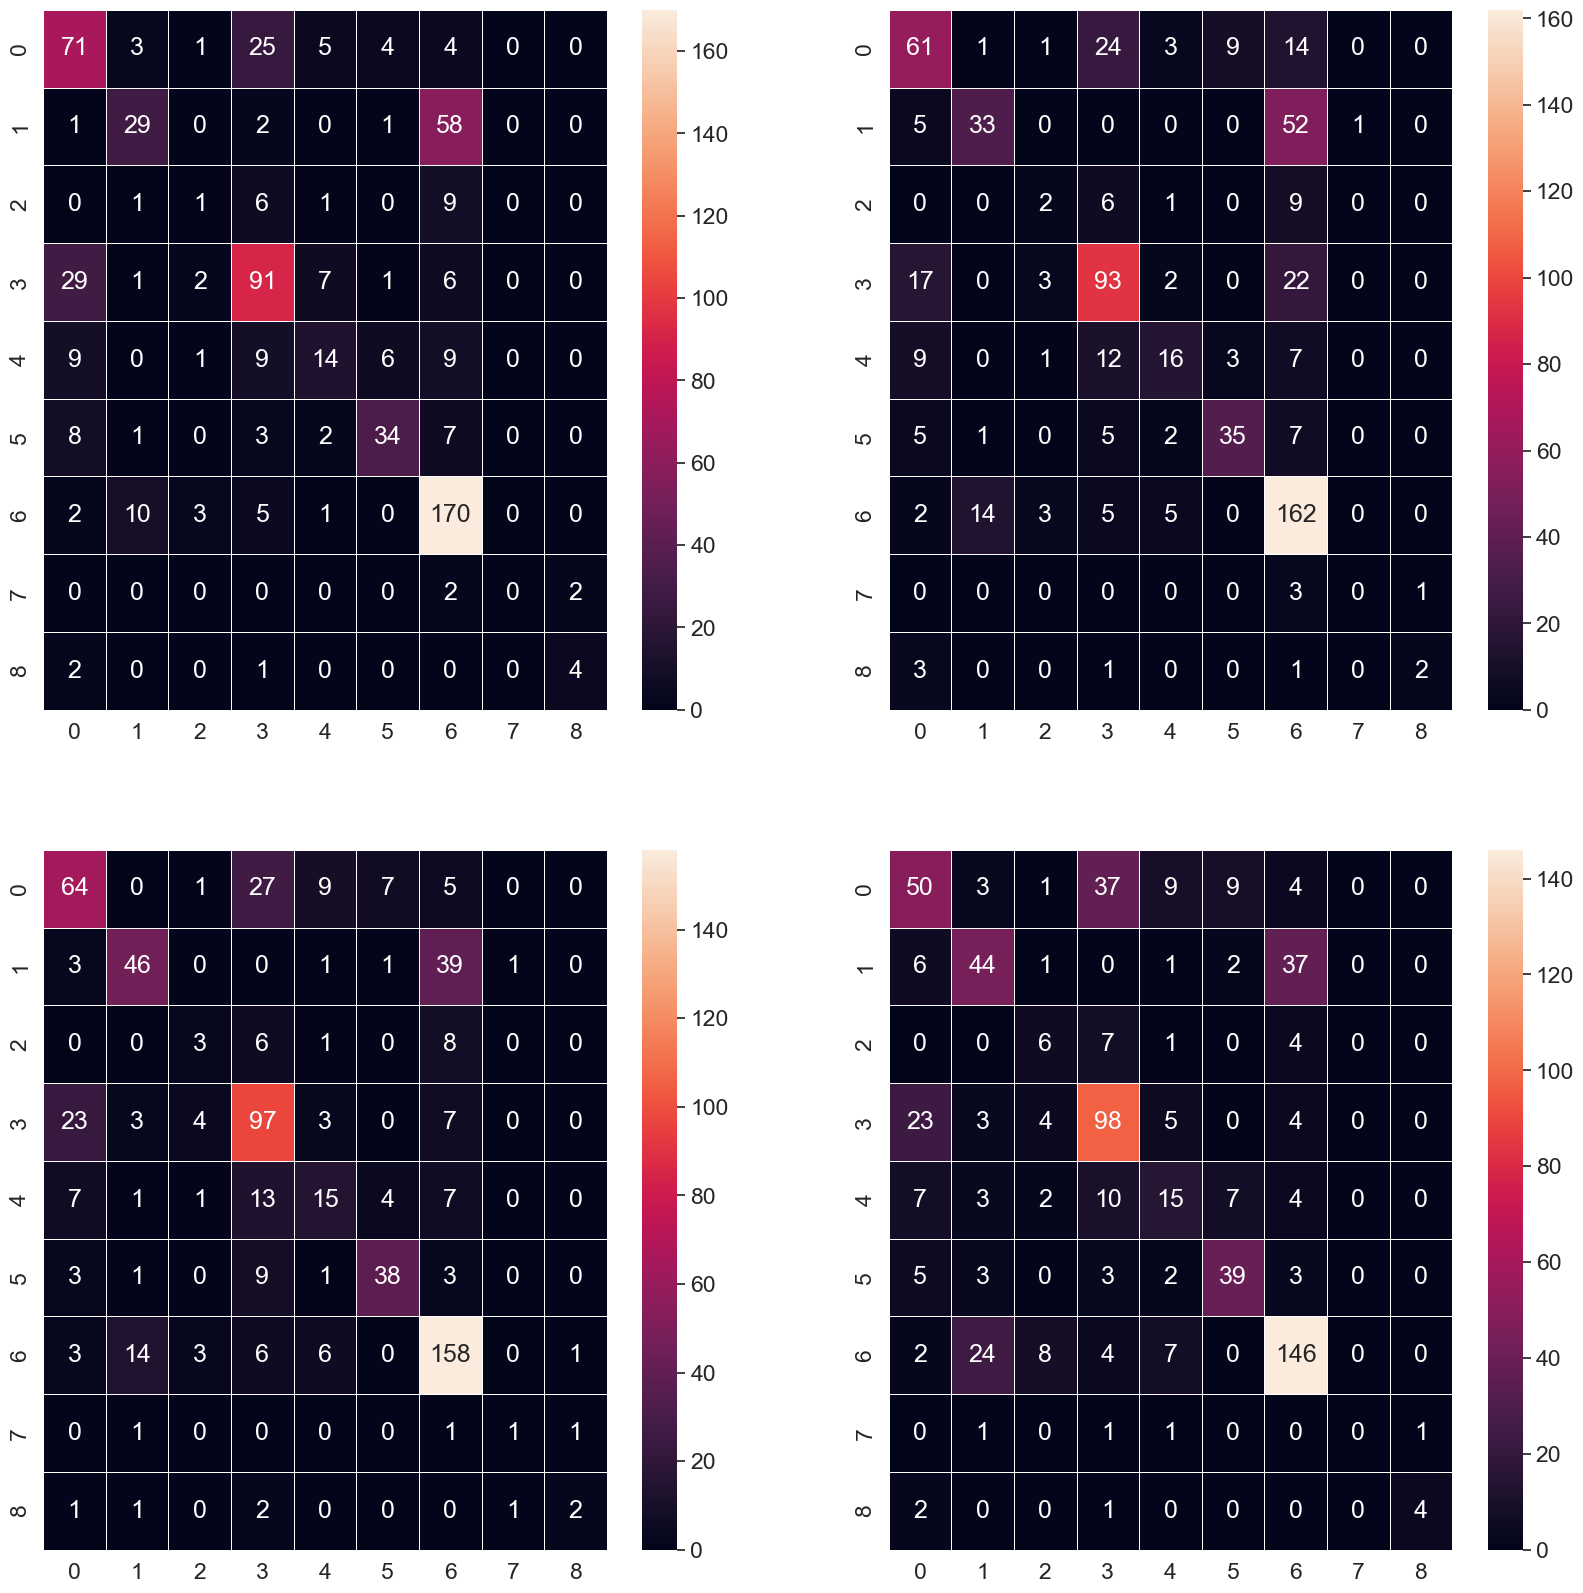

In [19]:
selected_classifiers = [
    model_svc,
    model_rf,
    model_gbc,
    model_mlp,
]

# subplots (2x2) confusion matrix for each classifier's predictions
import seaborn as sns
from sklearn.metrics import confusion_matrix

# set the font scale 1.5
sns.set(font_scale=1.5)


ax, fig = plt.subplots(2, 2, figsize=(20, 20))
for i, classifier in enumerate(selected_classifiers):
    print("Confusion matrix for classifier: ", classifier)
    cm = confusion_matrix(y_test, pred[classifier.__class__.__name__])
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=fig[i//2, i%2])

plt.savefig("img/baseline_models_confusion_matrix.png", dpi=600)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
# use NLP to classify the text deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ensure that code uses GPU
print(tf.test.gpu_device_name())

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train_data['Text'], train_data['Class'], test_size=0.2, random_state=0)

# vectorize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# train the model
embedding_dim = 50

model = keras.Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
print("Model summary: ", model.summary())

history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test))
                    
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

# predict the test data
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

print("Accuracy score for classifier: ", accuracy_score(y_test, pred))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           8276050   
                                                                 
 global_max_pooling1d_3 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,276,670
Trainable params: 8,276,670
Non-trainable params: 0
_________________________________________________________________
Model summary:  None
Training Accuracy: 0.8311
Testing Accuracy:  0.5602
21/21 [=============================

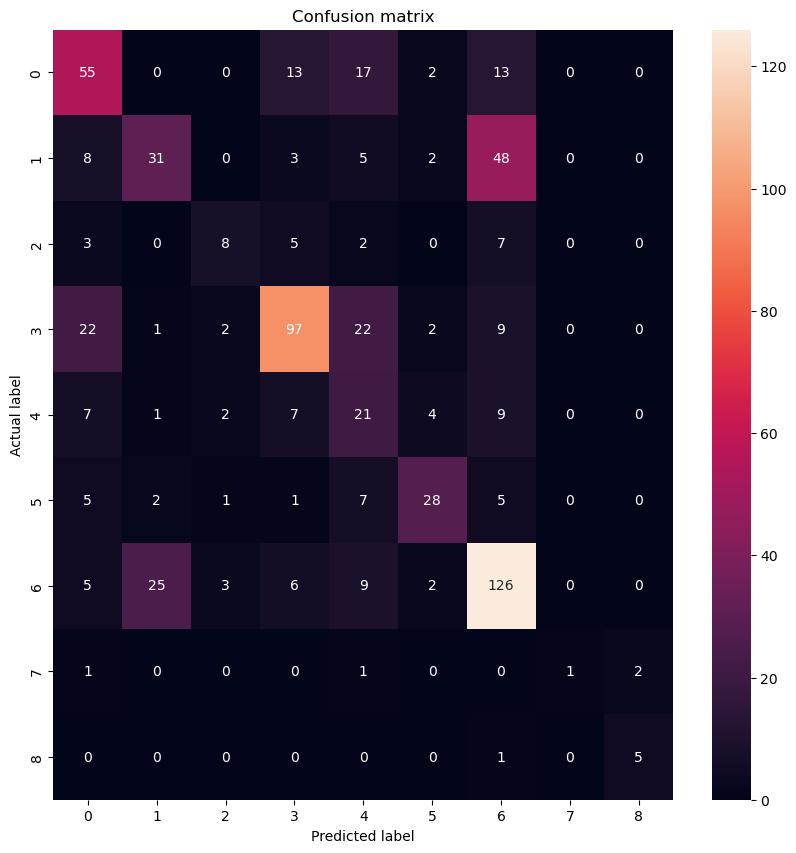

In [13]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [7]:
# look into the COSMIC. 

In [154]:
# deep learning NLP to predict the class

# import keras
from keras.preprocessing.text import Tokenizer



,ID,Gene,Variation,Class,Text
3297,3297,RUNX1,R177*,4,THE AML1 GENE IS KNOWN as the most frequent ta...
3298,3298,RUNX1,Y113*,4,Introduction Myelodysplastic syndromes (MDS) ...
3299,3299,RUNX1,R139G,4,The BCR-ABL fusion protein generated by t(9;22...
3300,3300,RUNX1,K83N,4,The most frequent mutations associated with le...
3301,3301,RUNX1,R177Q,4,The most frequent mutations associated with le...
3302,3302,RUNX1,R166Q,4,Familial platelet disorder with predisposition...
3303,3303,RUNX1,P173S,4,Introduction Myelodysplastic syndromes (MDS) ...
3304,3304,RUNX1,R201Q,4,Familial platelet disorder with predisposition...
3305,3305,RUNX1,S70fsX93,4,Introduction Myelodysplastic syndromes (MDS) ...
3306,3306,RUNX1,W279*,1,Here we report two new RUNX1 mutations in one ...


In [149]:
# import difflib
import difflib 


string_1 = train_data.loc[3317, "Text"]
string_2 = train_data.loc[3316, "Text"]

# at which location the two strings are different
for i in range(len(string_1)):
    if string_1[i] != string_2[i]:
        print(i)
        break

# print the two strings
print("i: ", i)
print(string_1[i-10:i+10])
print(string_2[i-10:i+10])

i:  40126
nd MDS/AML.
nd MDS/AML. Somatica


In [152]:
string_2[40126: ]

". Somatically acquired point mutations of AML1/RUNX1 gene have been recently identified in rare cases of acute myeloid leukemia (AML) and myelodysplastic syndrome (MDS). Moreover, germ line mutations of AML1 were found in an autosomal dominant disease, familial platelet disorder with predisposition to AML (FPD/AML), suggesting that AML1 mutants, as well as AML1 chimeras, contribute to the transformation of hematopoietic progenitors. In this report, we showed that AML1 point mutations were found in 6 (46%) of 13 MDS patients among atomic bomb (A-bomb) survivors in Hiroshima. Unlike acute or chronic leukemia patients among A-bomb survivors, MDS patients exposed relatively low-dose radiation and developed the disease after a long latency period. AML1 mutations also were found in 5 (38%) of 13 therapy-related AML/MDS patients who were treated with alkylating agents with or without local radiation therapy. In contrast, frequency of AML1 mutation in sporadic MDS patients was 2.7% (2 of 74).